<a href="https://colab.research.google.com/github/WanjikuGithu/Naive-Bayes-and-KNN/blob/main/SpamFilterClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Email Spam Classification**

**1. Defining the Question**

**Specifying the Question**

Implementing a Naive Bayes Classifier to identify whether an email is spam or not

**Defining the Metrics for Success**

The project will be a success when the following are met:


*   A Naive Bayes Classifier is implemented
*   Its metrics are evaluated and ways of optimising the model is explored


**Recording the Experimental Design**


*   Loading and Exploring the dataset
*   Cleaning the data
*   Exploratory Data Analysis
*   Naive Bayes Classification
*   Model Evaluation
*   Conclusion

**Understanding the Context of the Data**

Most email spam messages are commercial in nature and annoying. Others might be dangerous as they might contain phishing links and malware. It is therefore important to develop spam filters which can identify an email message as spam or not. This dataset came from a collection of spam e-mails that came from our postmaster and individuals who had filed spam. The collection of non-spam e-mails came from filed work and personal e-mails.


**2. Reading the data**

In [70]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Loading the names data
with open('spambase.names') as description:
  names = description.read()
  print(names)

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [72]:
# Reading the spam data
df = pd.read_csv('/content/spambase.data', names=['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class'])


In [73]:
# Determining the number of records
df.shape

(4601, 58)

In [74]:
# Viewing the  of the spam data
df.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [75]:
# Viewing the top of our dataset
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [76]:
# Viewing the bottom of our dataset
df.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [77]:
# Checking the missing values
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [78]:
# Checking for duplicates
df.duplicated().sum()

391

In [79]:
# Dropping duplicates
df.drop_duplicates(inplace=True)

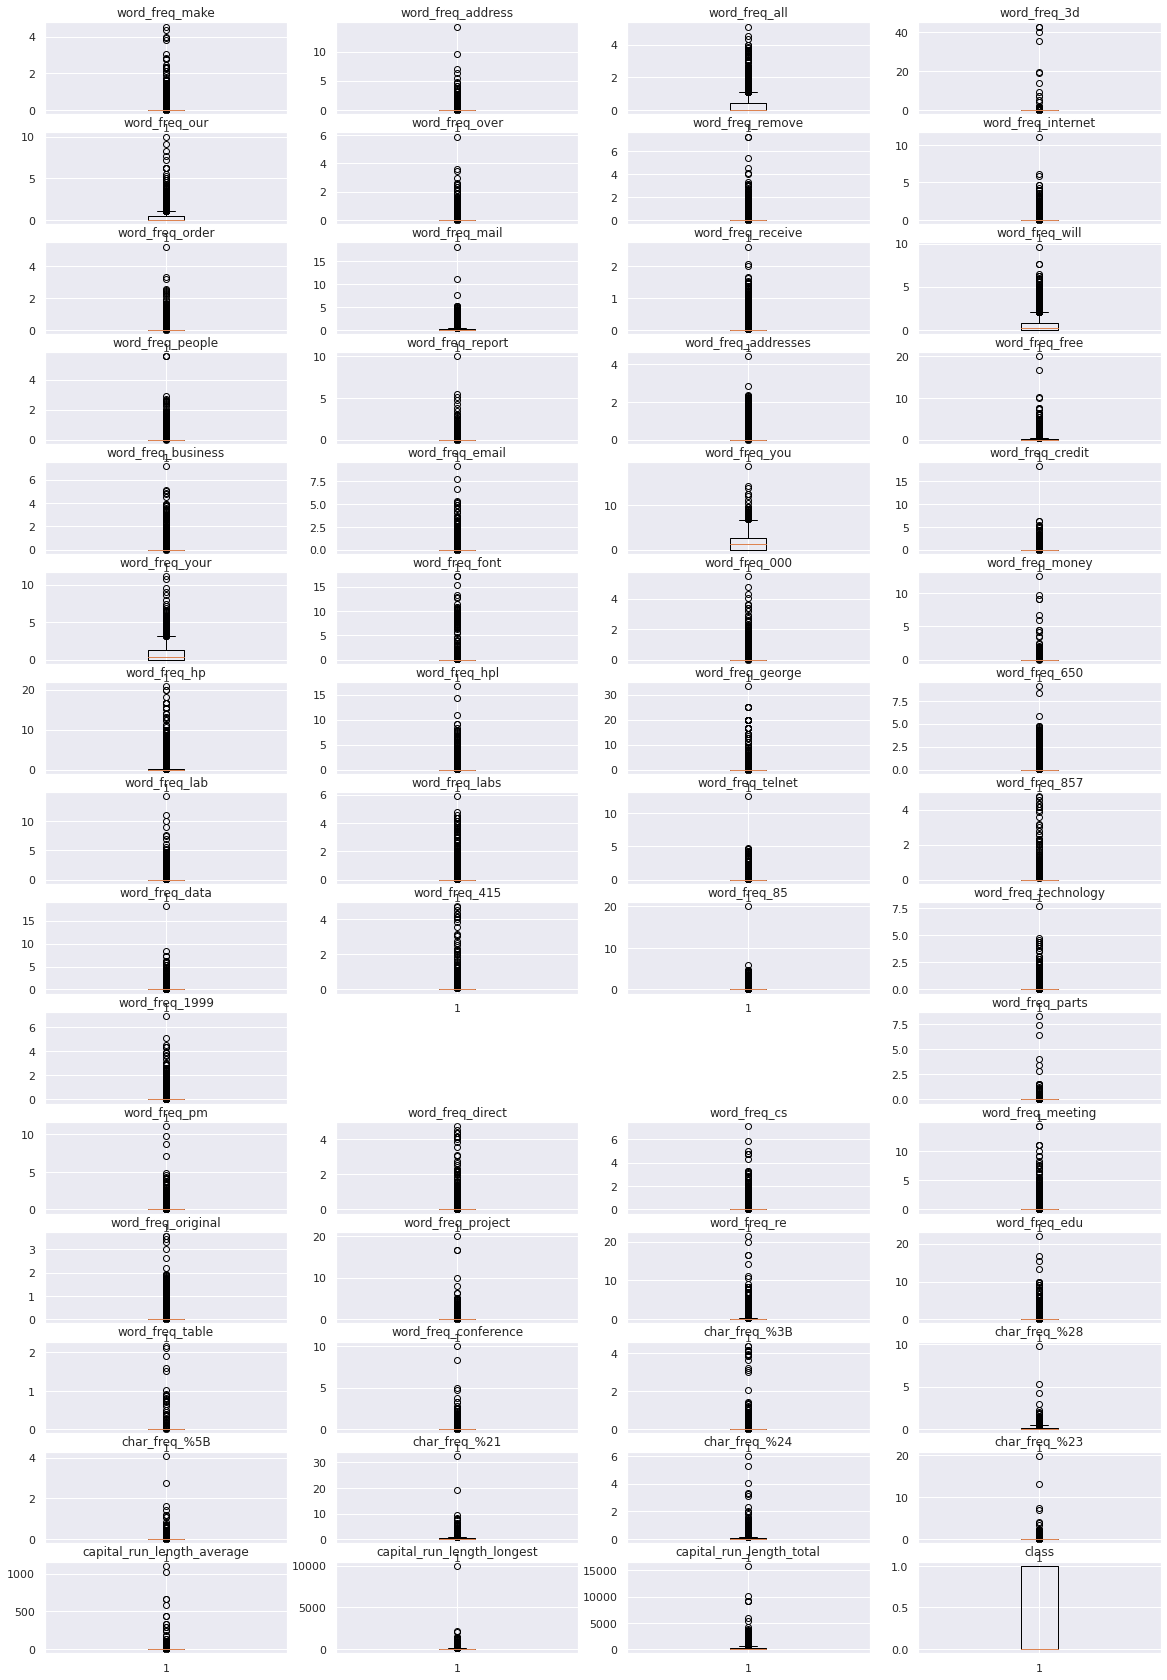

In [80]:
# Checking for outliers using a boxplot for all the variables in the dataset
columns_dict={'word_freq_make':1, 'word_freq_address':2, 'word_freq_all':3, 'word_freq_3d':4,
       'word_freq_our':5, 'word_freq_over':6, 'word_freq_remove':7,
       'word_freq_internet':8, 'word_freq_order':9, 'word_freq_mail':10,
       'word_freq_receive':11, 'word_freq_will':12, 'word_freq_people':13,
       'word_freq_report':14, 'word_freq_addresses':15, 'word_freq_free':16,
       'word_freq_business':17, 'word_freq_email':18, 'word_freq_you':19,
       'word_freq_credit':20, 'word_freq_your':21, 'word_freq_font':22, 'word_freq_000':23,
       'word_freq_money':24, 'word_freq_hp':25, 'word_freq_hpl':26, 'word_freq_george':27,
       'word_freq_650':28, 'word_freq_lab':29, 'word_freq_labs':30, 'word_freq_telnet':31,
       'word_freq_857':32, 'word_freq_data':33, 'word_freq_415':34, 'word_freq_85':35,
       'word_freq_technology':36, 'word_freq_1999':37, 'word_freq_parts':40,
       'word_freq_pm':41, 'word_freq_direct':42, 'word_freq_cs':43, 'word_freq_meeting':44,
       'word_freq_original':45, 'word_freq_project':46, 'word_freq_re':47,
       'word_freq_edu':48, 'word_freq_table':49, 'word_freq_conference':50,
       'char_freq_%3B':51, 'char_freq_%28':52, 'char_freq_%5B':53, 'char_freq_%21':54,
       'char_freq_%24':55, 'char_freq_%23':56, 'capital_run_length_average':57,
       'capital_run_length_longest':58, 'capital_run_length_total':59, 'class':60}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(15,4,i)
  plt.boxplot(df[variable])
  plt.title(variable)

plt.show()

The data requires little cleaning since there are no missing values. Most of the variables have outliers but we're going to work with them as they're the true representation of what was recorded.

**Exploratory Data Analysis**

In [81]:
# Frequency count of the target variable
df['class'].value_counts()

0    2531
1    1679
Name: class, dtype: int64

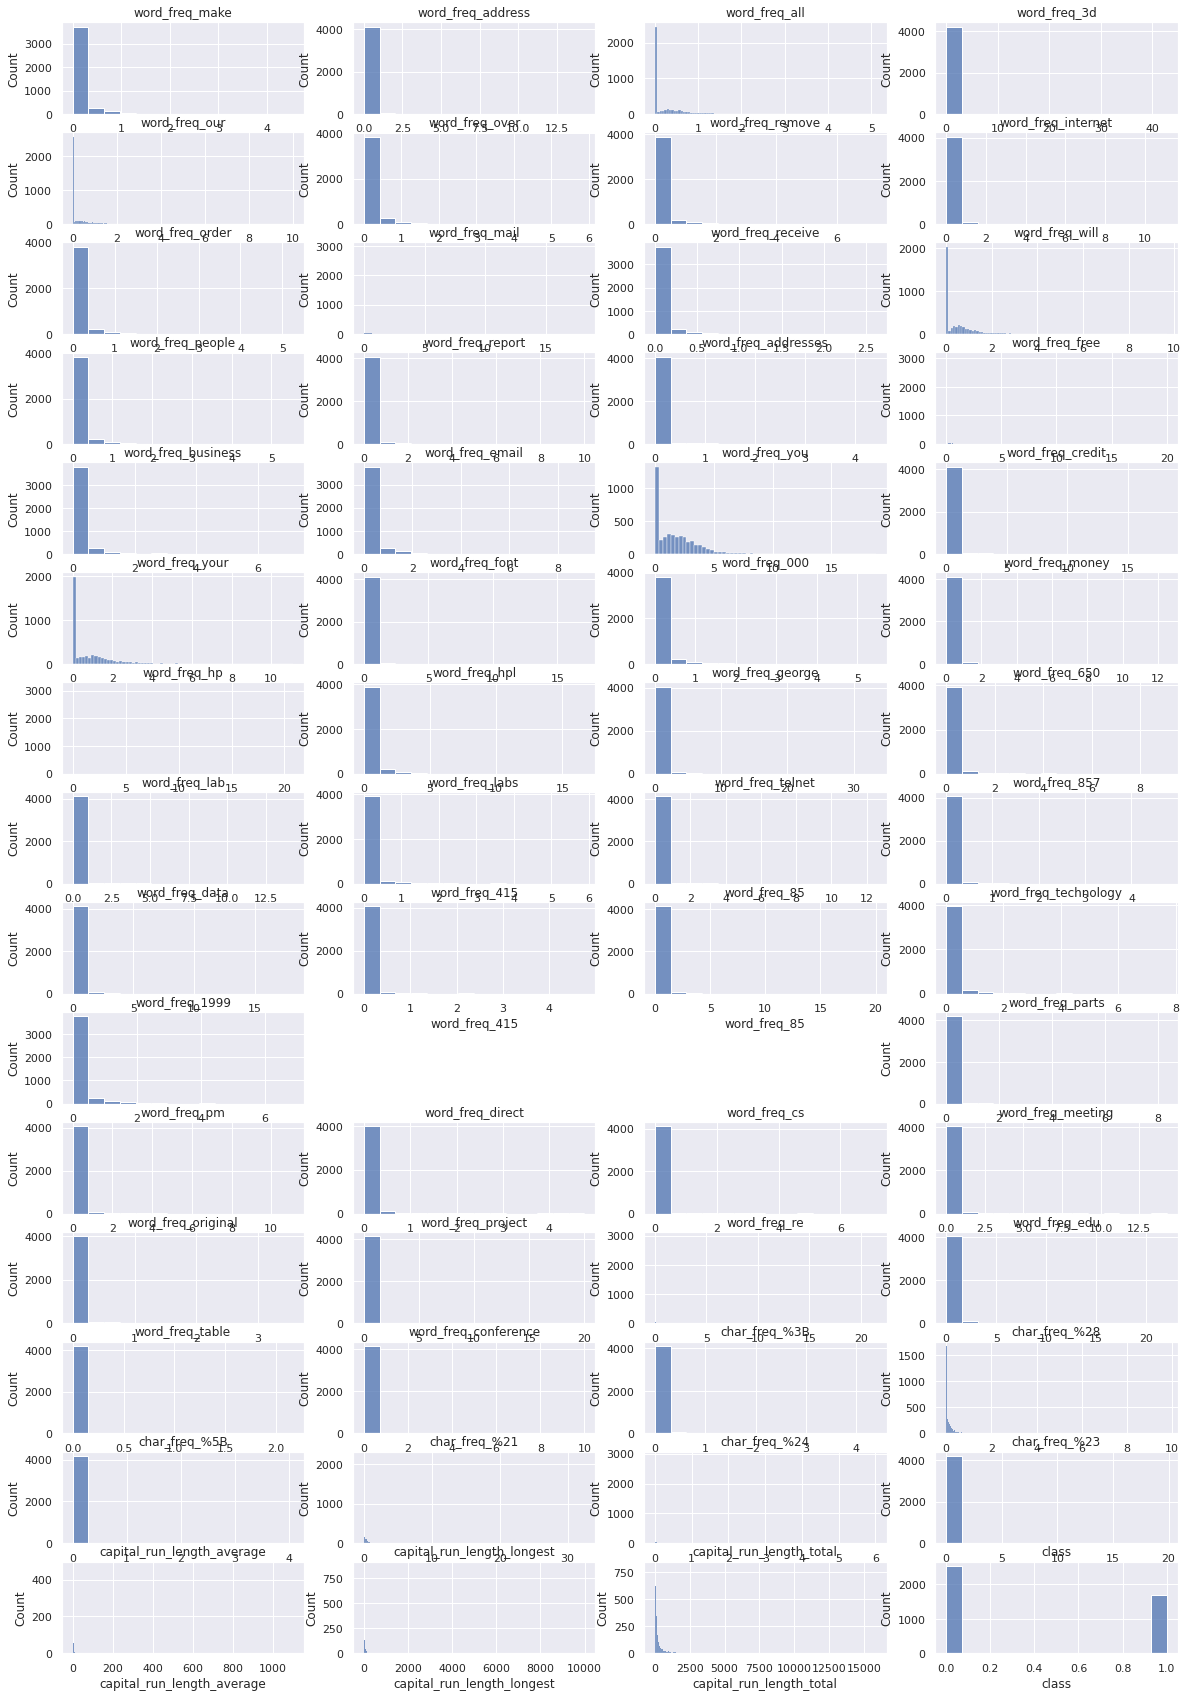

In [82]:
# Viewing the distributions of the variables using a histogram 

columns_dict={'word_freq_make':1, 'word_freq_address':2, 'word_freq_all':3, 'word_freq_3d':4,
       'word_freq_our':5, 'word_freq_over':6, 'word_freq_remove':7,
       'word_freq_internet':8, 'word_freq_order':9, 'word_freq_mail':10,
       'word_freq_receive':11, 'word_freq_will':12, 'word_freq_people':13,
       'word_freq_report':14, 'word_freq_addresses':15, 'word_freq_free':16,
       'word_freq_business':17, 'word_freq_email':18, 'word_freq_you':19,
       'word_freq_credit':20, 'word_freq_your':21, 'word_freq_font':22, 'word_freq_000':23,
       'word_freq_money':24, 'word_freq_hp':25, 'word_freq_hpl':26, 'word_freq_george':27,
       'word_freq_650':28, 'word_freq_lab':29, 'word_freq_labs':30, 'word_freq_telnet':31,
       'word_freq_857':32, 'word_freq_data':33, 'word_freq_415':34, 'word_freq_85':35,
       'word_freq_technology':36, 'word_freq_1999':37, 'word_freq_parts':40,
       'word_freq_pm':41, 'word_freq_direct':42, 'word_freq_cs':43, 'word_freq_meeting':44,
       'word_freq_original':45, 'word_freq_project':46, 'word_freq_re':47,
       'word_freq_edu':48, 'word_freq_table':49, 'word_freq_conference':50,
       'char_freq_%3B':51, 'char_freq_%28':52, 'char_freq_%5B':53, 'char_freq_%21':54,
       'char_freq_%24':55, 'char_freq_%23':56, 'capital_run_length_average':57,
       'capital_run_length_longest':58, 'capital_run_length_total':59, 'class':60}

plt.figure(figsize=(20,30))

# make a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(15,4,i)
  sns.histplot(df[variable])
  sns.set(style='darkgrid')
  plt.title(variable)

plt.show()

**Implementing the Solution**


In [84]:
# Defining the features and target variable
X = df.drop(['class'], axis=1).values
y = df['class'].values

In [85]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [86]:
# Initialising the Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Fitting the model on the dataset
nb_classifier.fit(X_train, y_train)

# Running the prediction
y_pred = nb_classifier.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [87]:
# Getting the evaluation metrics
print('Classification Report:', metrics.classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.78      0.84      0.81       495
           1       0.74      0.67      0.71       347

    accuracy                           0.77       842
   macro avg       0.76      0.75      0.76       842
weighted avg       0.77      0.77      0.77       842



**Improving the model performance**

In [88]:
# Increasing the test size to 0.3
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialising the Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Fitting the model on the dataset
nb_classifier.fit(X_train, y_train)

# Running the prediction
y_pred = nb_classifier.predict(X_test)
y_pred

# Getting the evaluation metrics
print('Classification Report:', metrics.classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.79      0.85      0.82       737
           1       0.76      0.69      0.73       526

    accuracy                           0.78      1263
   macro avg       0.78      0.77      0.77      1263
weighted avg       0.78      0.78      0.78      1263



In [89]:
# Increasing the test size to 0.4
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialising the Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Fitting the model on the dataset
nb_classifier.fit(X_train, y_train)

# Running the prediction
y_pred = nb_classifier.predict(X_test)
y_pred

# Getting the evaluation metrics
print('Classification Report:', metrics.classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.84      0.82       988
           1       0.76      0.71      0.74       696

    accuracy                           0.79      1684
   macro avg       0.78      0.78      0.78      1684
weighted avg       0.79      0.79      0.79      1684



Increasing the test size slightly increases the accuracy score of the models.

The performance of a Naive Bayes Classifier can be improved with the following techniques:



*   Normalization
*   Removing redundant or correlated features
*   Applying Smoothing Techniques by specifying alpha (Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing))





In [90]:
# Normalizing our dataset
# Initialising the normalizer
normalizer = Normalizer(norm='l2')

# Transforming the features
X = df.drop(['class'], axis=1).values
y = df['class'] 
normalizer.transform(X)

array([[0.00000000e+00, 2.24834975e-03, 2.24834975e-03, ...,
        1.31950026e-02, 2.14295835e-01, 9.76626921e-01],
       [2.03297105e-04, 2.71062806e-04, 4.84040726e-04, ...,
        4.95076854e-03, 9.77762266e-02, 9.95187732e-01],
       [2.59683978e-05, 0.00000000e+00, 3.07292708e-04, ...,
        4.25059392e-03, 2.09911216e-01, 9.77710178e-01],
       ...,
       [2.53812946e-03, 0.00000000e+00, 2.53812946e-03, ...,
        1.18784459e-02, 5.07625892e-02, 9.98330921e-01],
       [1.22759766e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.46672345e-02, 6.39373781e-02, 9.97423098e-01],
       [0.00000000e+00, 0.00000000e+00, 1.59858723e-02, ...,
        3.07420620e-02, 1.22968248e-01, 9.83745986e-01]])

In [91]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialising the Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Fitting the model on the dataset
nb_classifier.fit(X_train, y_train)

# Running the prediction
y_pred = nb_classifier.predict(X_test)
y_pred

# Getting the evaluation metrics
print('Classification Report:', metrics.classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.84      0.82       988
           1       0.76      0.71      0.74       696

    accuracy                           0.79      1684
   macro avg       0.78      0.78      0.78      1684
weighted avg       0.79      0.79      0.79      1684



In [92]:
# Using the minmax scaler
X = df.drop(['class'], axis=1).values
y = df['class'] 
X = MinMaxScaler().fit_transform(X)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialising the Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Fitting the model on the dataset
nb_classifier.fit(X_train, y_train)

# Running the prediction
y_pred = nb_classifier.predict(X_test)
y_pred

# Getting the evaluation metrics
print('Classification Report:', metrics.classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.84      0.97      0.90       988
           1       0.94      0.73      0.82       696

    accuracy                           0.87      1684
   macro avg       0.89      0.85      0.86      1684
weighted avg       0.88      0.87      0.86      1684



In [93]:
# Checking the correlation matrix
df.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,0.034012,0.063207,0.005388,0.021740,0.055067,0.011061,-0.004370,0.103842,0.040829,0.063031,0.075911,0.061985,0.032263,0.022454,0.065443,0.081471,0.051571,0.120563,0.020924,0.121458,-0.025574,0.126478,0.205689,-0.075054,-0.063467,-0.048086,-0.050054,-0.041541,-0.054241,-0.038899,-0.031634,-0.042715,-0.026322,-0.046083,-0.057296,-0.058771,-0.008626,-0.011199,-0.035467,-0.005280,-0.026546,-0.025603,-0.022980,-0.037848,-0.034455,-0.000950,-0.018904,-0.027248,-0.019636,-0.034784,0.059184,0.101957,-0.009149,0.044783,0.059128,0.084127,0.129194
word_freq_address,0.034012,1.000000,0.027789,-0.008947,0.036975,0.005526,0.077374,0.013706,0.053426,0.184304,0.060724,0.026247,0.015538,0.012414,0.061826,0.046630,0.022018,0.178853,0.055876,-0.006735,0.117797,0.001214,0.007064,0.061282,-0.053573,-0.044627,-0.011228,-0.033000,-0.026048,-0.029419,-0.015937,0.028852,-0.032575,0.026039,-0.025524,-0.028262,0.003749,-0.012708,-0.016208,0.002326,-0.019350,-0.035908,0.037681,-0.029055,0.020029,-0.026004,-0.012337,-0.020947,0.014735,-0.028348,-0.019436,0.031858,0.044354,0.030669,0.029355,0.053870,0.034590,0.100651
word_freq_all,0.063207,0.027789,1.000000,-0.019901,0.065676,0.066547,0.028581,0.007221,0.077561,0.025138,0.055647,0.065733,0.036431,0.004900,0.104574,0.061937,0.029834,0.110794,0.126502,0.030874,0.147895,-0.039464,0.106694,0.031150,-0.092684,-0.066464,-0.081297,-0.051471,-0.057847,-0.030519,-0.036610,-0.063579,-0.058002,-0.063417,-0.048968,-0.047593,-0.074329,0.031756,-0.017418,-0.046013,-0.030822,-0.007620,-0.052736,-0.056883,-0.056600,-0.060558,0.027384,-0.029465,-0.036778,-0.024545,-0.035805,0.097316,0.072944,-0.004520,0.095671,0.092513,0.051961,0.172350
word_freq_3d,0.005388,-0.008947,-0.019901,1.000000,0.000256,-0.009163,0.014289,0.003801,-0.001040,-0.003845,-0.013191,-0.018577,-0.013153,0.003379,0.005375,0.005798,-0.002827,0.016561,-0.009933,-0.005006,0.004577,0.030589,0.014715,0.025851,-0.015702,-0.014030,-0.009710,-0.010630,-0.007931,-0.010911,-0.007654,-0.006967,-0.008246,-0.006975,-0.005907,-0.006309,-0.007436,-0.002723,-0.004506,-0.007654,-0.006075,-0.008318,-0.009384,-0.006114,-0.013178,-0.009432,-0.003409,-0.001861,-0.000028,-0.011443,-0.007514,-0.003867,0.008273,0.000134,0.005754,0.022105,0.023785,0.056383
word_freq_our,0.021740,0.036975,0.065676,0.000256,1.000000,0.041392,0.135957,0.023411,0.014483,0.027233,0.079164,0.055007,0.020657,0.001586,0.048309,0.079198,0.137868,0.050785,0.083092,0.027838,0.142992,-0.022715,0.062136,0.000321,-0.076783,-0.079807,-0.062482,-0.064151,0.039627,-0.053613,-0.042054,-0.024256,-0.034749,-0.024555,-0.051058,-0.052210,-0.077682,0.133057,-0.045512,-0.017580,-0.052325,0.107706,-0.054583,0.002771,-0.049497,-0.083315,-0.028146,-0.035040,-0.035049,-0.054580,-0.027988,0.019203,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230074
word_freq_over,0.055067,0.005526,0.066547,-0.009163,0.041392,1.000000,0.046868,0.079704,0.097037,0.010099,0.056592,0.001582,0.067278,0.007932,0.140009,0.016681,0.057684,0.059196,0.083312,0.057502,0.105693,0.006869,0.181754,0.059429,-0.086682,-0

In [94]:
# Creating a function to calculate Variance Inflation Factor for checking multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

calc_vif(df)

In [95]:
# Dropping the columns with high VIF values
df = df.drop(['word_freq_857', 'word_freq_415'], axis=1)

In [96]:
# Defining our features and target varible
X = df.drop(['class'], axis=1).values
y = df['class'] 
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialising the Naive Bayes Classifier
nb_classifier = MultinomialNB()

# Fitting the model on the dataset
nb_classifier.fit(X_train, y_train)

# Running the prediction
y_pred = nb_classifier.predict(X_test)
y_pred

# Getting the evaluation metrics
print('Classification Report:', metrics.classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.84      0.82       988
           1       0.76      0.71      0.73       696

    accuracy                           0.79      1684
   macro avg       0.78      0.77      0.78      1684
weighted avg       0.78      0.79      0.78      1684



**Conclusion**

 Normalization using the min max scaler is the only technique that greatly improves our model. We did not perform a smoothing technique since this was already done when initialising the MultinomialNB Classifier as the smoothing parameter(Additive Laplace/Lidstone) is added by default. The accuracy after removing correlated features remained the same as with the modelling of all the features. We recommend sampling of the data as the class labels were not well balanced to see whether our model improves. 
